In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gökhan Topdanış – B200109039
# Emircan Bağdu - B200109041

In [ ]:
#KÜTÜPHANELER
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

In [ ]:
# Veri dizinleri
data_dir = "drive/MyDrive/Yapay zeka"
pos_dir = os.path.join(data_dir, "pozitif")
neg_dir = os.path.join(data_dir, "negatif")

In [ ]:
# Görüntüler ve etiketler için boş listeler
images = []
labels = []

In [ ]:
# Pozitif sınıf için görüntüleri işleme
for img_path in os.listdir(pos_dir):
    if img_path.endswith('.jpg'):
        img = cv2.imread(os.path.join(pos_dir, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (227, 227))

        # Filtreleme
        img = cv2.blur(img, (3, 3))

        # Thresholding
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

        # Morfolojik İşlemler
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

        images.append(img_morph)
        labels.append(1)  # Pozitif sınıf için 1

In [ ]:
# Negatif sınıf için görüntüleri işleme
for img_path in os.listdir(neg_dir):
    if img_path.endswith('.jpg'):
        img = cv2.imread(os.path.join(neg_dir, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (227, 227))

        # Filtreleme
        img = cv2.blur(img, (3, 3))

        # Thresholding
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

        # Morfolojik İşlemler
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

        images.append(img_morph)
        labels.append(0)  # Negatif sınıf için 0

In [ ]:
# Görüntüleri ve etiketleri numpy dizilerine dönüştürme
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Eğitim ve test verilerini böleme
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [ ]:
# Giriş şekli
input_shape = (227, 227, 1)  # Gri tonlamalı görüntüler olduğu için kanal sayısı 1 olmalıdır
num_classes = 2 # Sınıf sayısı
batch_size = 64 # Küme Boyutu
epochs = 50 # Eğitimin epoch sayısı

In [ ]:
# Model oluşturma
model = Sequential()

# 1. Katman
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 2. Katman
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# 3. Katman
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4. Katman
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5. Katman
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Çıkış katmanı
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Model derleme
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model eğitimi
hist_ADAM = model.fit(X_train, y_train, 
                      batch_size=batch_size, 
                      epochs=epochs, 
                      validation_split=0.2)


Epoch 1/50
36/36 [==============================] - 54s 890ms/step - loss: 0.3895 - accuracy: 0.9327 - val_loss: 0.3946 - val_accuracy: 0.8523
Epoch 2/50
36/36 [==============================] - 27s 743ms/step - loss: 0.1676 - accuracy: 0.9479 - val_loss: 1.0972 - val_accuracy: 0.4804
Epoch 3/50
36/36 [==============================] - 27s 763ms/step - loss: 0.1257 - accuracy: 0.9666 - val_loss: 0.2402 - val_accuracy: 0.9537
Epoch 4/50
36/36 [==============================] - 28s 784ms/step - loss: 0.1072 - accuracy: 0.9648 - val_loss: 0.9309 - val_accuracy: 0.4822
Epoch 5/50
36/36 [==============================] - 28s 767ms/step - loss: 0.0986 - accuracy: 0.9719 - val_loss: 0.2305 - val_accuracy: 0.9217
Epoch 6/50
36/36 [==============================] - 28s 769ms/step - loss: 0.0802 - accuracy: 0.9755 - val_loss: 1.5783 - val_accuracy: 0.4822
Epoch 7/50
36/36 [==============================] - 28s 776ms/step - loss: 0.0537 - accuracy: 0.9822 - val_loss: 2.3636 - val_accuracy: 0.4804

In [ ]:
# Modeli değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

38/38 [==============================] - 5s 93ms/step - loss: 0.2031 - accuracy: 0.9593
Test accuracy: 0.9592685103416443


In [ ]:
# Test veri kümesi üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

38/38 [==============================] - 2s 62ms/step


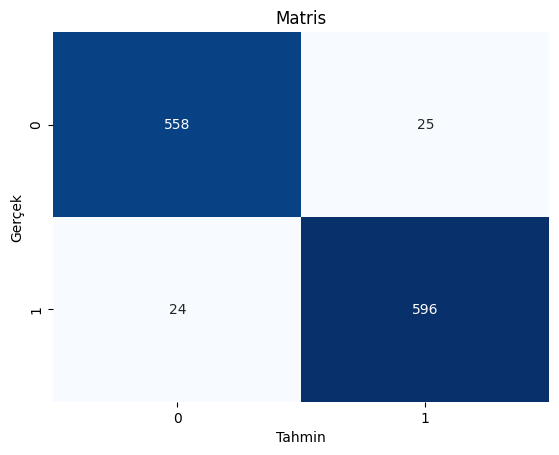

skor :  [[558  25]
 [ 24 596]]


In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred_classes)
# Karmaşıklık matrisinin görselleştirilmesi
sns.heatmap(cm, cmap="Blues", cbar=None, annot=True, fmt='.3g')
plt.title("Matris") 
plt.ylabel("Gerçek")
plt.xlabel("Tahmin") 
plt.show()
print("skor : ",cm )